### Lab 5 Interestingness

In this lab, you will association rule mining. You will use basic Python libraries, the Apriori library (https://efficient-apriori.readthedocs.io/en/latest/) and the Networkx library (https://networkx.org). Please save the file in the folowwing format 'lab5_yourname.ipynb' and submit by the due date.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from PIL import Image

# Interestingness

### Interestingness through Market-Basket analysis

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions.

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

### Apriori algorithm

The Apriori algorithm generates association rules for a given data set. An association rule implies that if an item A occurs, then item B also occurs with a certain probability. Let's look at an example.

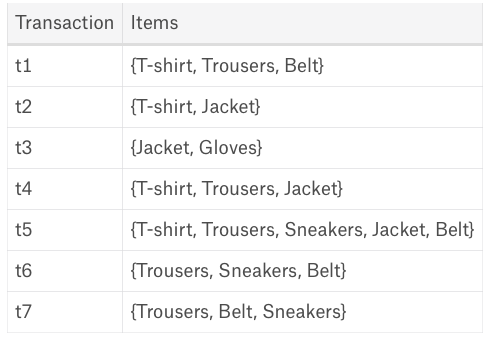

In [2]:
from IPython.display import Image
Image(filename='Images/market_basket.v1.png')

In the table above seven transactions from a clothing store are shown. Each transaction shows items bought in that transaction. We can represent our items as an item set as follows

$$ I = (i_1,i2,..., in) $$

                                        
In this case it will be:

                               
                                {T-shirt,Trousers,Belt,Jacket,Gloves,Sneakers}

A transaction is represented by the following expression:

$$  T = {t_1,i_2,..., t_k} $$

For instance

                                        T = {T-shirt,Trousers,Belt}

Then, an association rule is defined as an implication of the form:

$$ X=>Y, where  \quad  X ,  Y \subset I  \quad and \quad X \cap Y = 0 $$

For instance,
                                   
                                             {T-shirt, Trousers} => {Belt}
                    

## Interestingness Measures

- Support
- Confidence
- Lift
- Conviction

### Support

Support is a measure of how frequently the itemset appears in the dataset.

$$ supp(X=>Y) = \frac{X\cap Y}{n}  $$

In other words, support is the number of transactions with both X and Y divided by the total number of records.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Calculate the support of the following rules. Write your answers belows. One of the examples has already been calculated for you.

</div>

Let's look at some association rules with their supports calculated.

$ supp(Trousers => Jacket)  = \frac{2}{7}=28.5\%$

$ supp(T-shirt => Trousers) = \frac{3}{7}=43\%$

$ supp(Trousers => Belt) = \frac{4}{7}=57\%$

$ supp(T-shirt => Belt) = \frac{2}{7}=28.5\%$

$ supp(T-shirt,Trousers => Belt ) = \frac{2}{7}=28.5\%$

### Confidence

In an association rule X => Y, given that X occured, confidence is the frequency of Y happening. Mathematically, it is defined as follows:

$$ conf(X=>Y) = \frac{supp(X,Y)}{supp(X)} $$ 


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Calculate the confidence of the following rules.

</div>

$ conf(Sneaekrs => T-shirt) = \frac{1}{3}=33\%$

$ conf(T-shirt => Jacket)  = \frac{3}{4}=75\%$

$ conf( \{Trousers, Belt\} => Sneakers)  = \frac{3}{4}=75\%$

### Lift

Lift is the ratio of the observed support to that expected if X and Y were independent. Lift is defined as follows:

$$ lift(X=>Y) = \frac{supp(X , Y)}{supp(X)supp(Y)} $$ 

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Calculate the lift of the following rules.

</div>

$ lift(Trousers => Jacket)  = \frac{2/7}{(5/7) * (4/7)}=10\%$

$ lift( \{T-shirt,Belt\} => Trousers)  = \frac{2/7}{(2/7) * (5/7)}=20\%$

$ lift( T-shirt => Sneakers)  = \frac{1/7}{(4/7) * (3/7)}=8.3\%$

### Conviction

Conviction can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions. Mathematically, conviction is defined as follows:

$$ conv(X=>Y) = \frac{1-supp(Y)}{1-conf(X=>Y)}  $$

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

Calculate the conviction of the following rules.

</div>

$ conv(Trousers => Jacket)  = \frac{1-(4/7)}{(1-0.75)}= 1.2$

$ conv( \{T-shirt,Belt\} => Trousers)  = \frac{1-(5/7)}{(1-1) }= Undefined$

$ conv( T-shirt => Sneakers)  =  \frac{1-(3/7)}{(1-0.25) }= 0.9333$

## Analysing interestingness measures on a real-world dataset

The dataset contains 15010 records(transactions) each with four columns. The description of the columns are as follows:

- Date: Indicates date of trasaction (YYYY-MM-DD format). It ranges from 30/10/2016 to 09/04/2017
- Time: Time of transaction (HH:MM:SS format)
- Transaction: Categorical variable which allows to differentiate between transactions. Those rows that share the same transaction code belong to the same transaction. 
- Item: Categorical variables shows items of transactions

In [24]:
data = pd.read_csv('BreadBasket_DMS.csv')
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

- Plot the items against their corresponding frequencies as a bar plot.

- Plot number of transactions per month.

- Plot number of transactions per weekday.

- Plot number of transactions per hour.

</div>

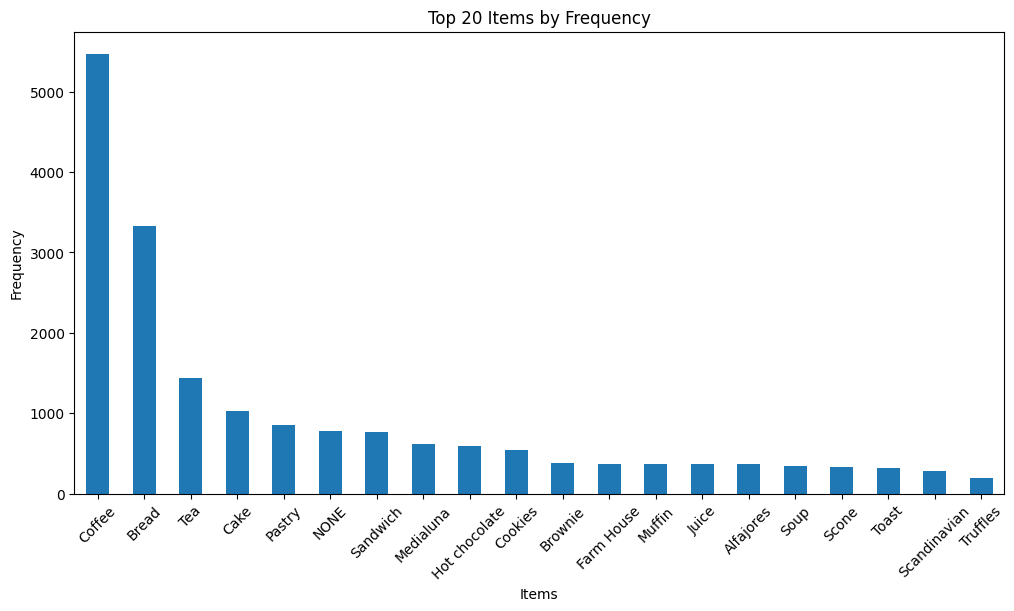

In [4]:
#1. Plot the items against their corresponding frequencies as a bar plot.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('BreadBasket_DMS.csv')

# Count the frequency of each item
item_counts = data['Item'].value_counts()

# Plotting
plt.figure(figsize=(12,6))
item_counts[:20].plot(kind='bar')
plt.title('Top 20 Items by Frequency')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


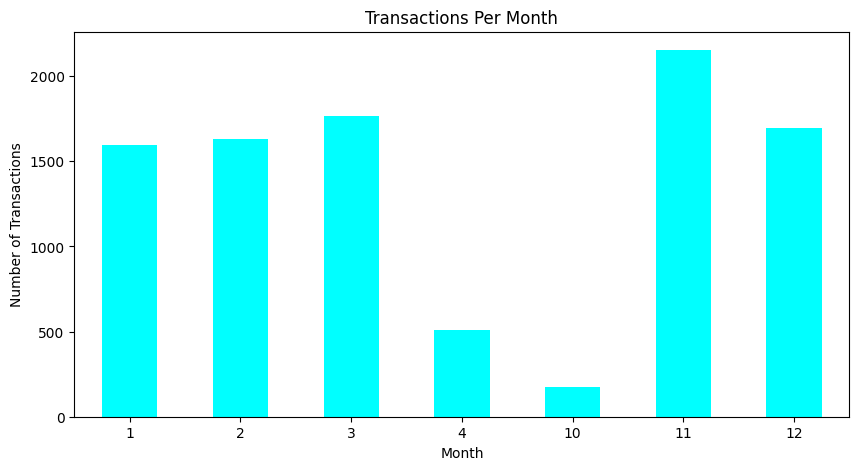

In [5]:
# Plot number of transactions per month.
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Count the number of transactions for each month
monthly_transactions = data.groupby('Month')['Transaction'].nunique()

# Plotting
plt.figure(figsize=(10,5))
monthly_transactions.plot(kind='bar', color='cyan')
plt.title('Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


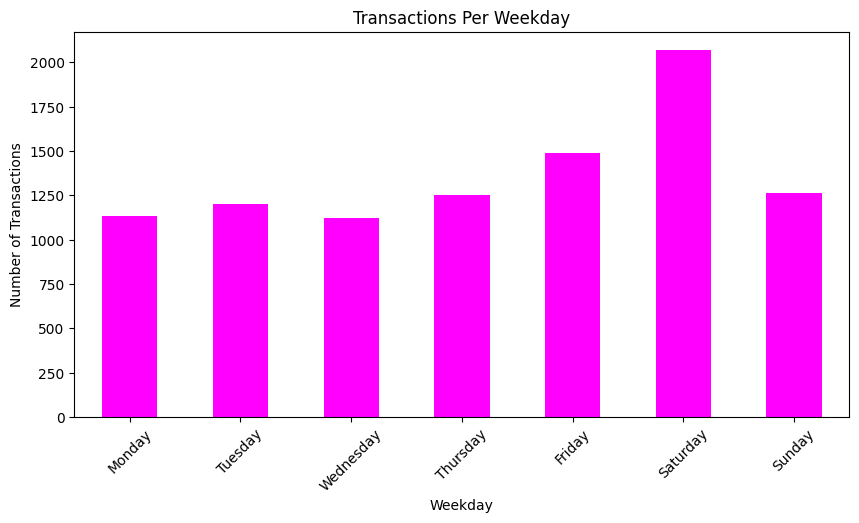

In [6]:
# 3. Plot number of transactions per weekday.
data['Weekday'] = pd.to_datetime(data['Date']).dt.day_name()

# Count the number of transactions for each weekday
weekday_transactions = data.groupby('Weekday')['Transaction'].nunique()

# Weekday order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting
plt.figure(figsize=(10,5))
weekday_transactions.loc[order].plot(kind='bar', color='magenta')
plt.title('Transactions Per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


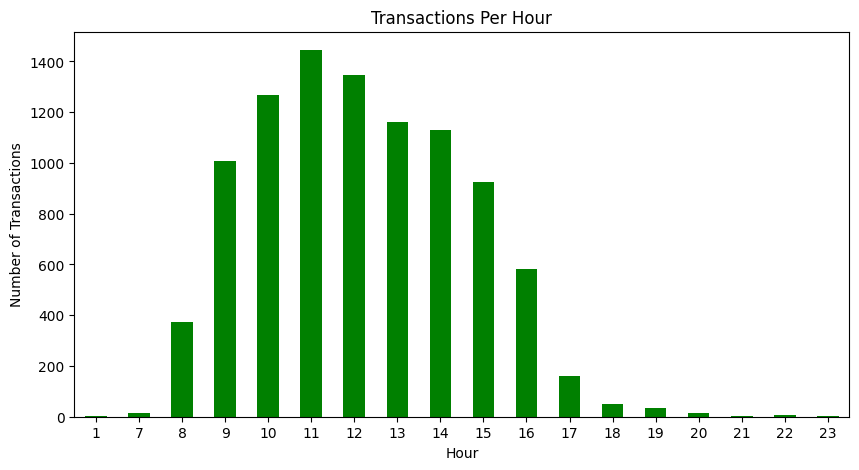

In [7]:
# 4. Plot number of transactions per hour.
data['Hour'] = pd.to_datetime(data['Time']).dt.hour

# Count the number of transactions for each hour
hourly_transactions = data.groupby('Hour')['Transaction'].nunique()

# Plotting
plt.figure(figsize=(10,5))
hourly_transactions.plot(kind='bar', color='green')
plt.title('Transactions Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


## Apriori Algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over transactional databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

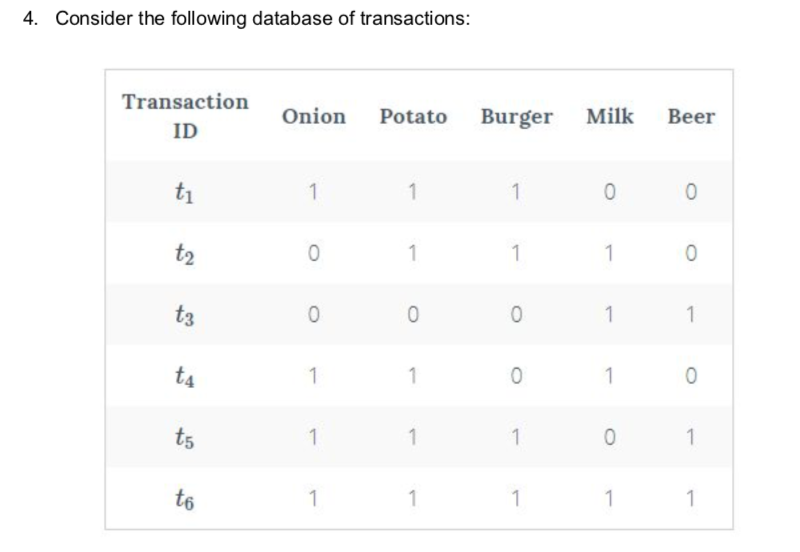

In [8]:
Image(filename='Images/Apriori0.png')

1- We create a frequency table of all the items that occur in all the transactions. 

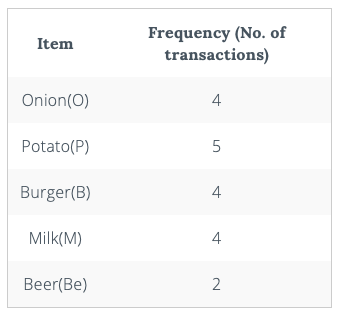

In [9]:
Image(filename='Images/Apriori.v1.png')

2- We know that elements are significant when the support is greater than or equal to the threshold support.
Here, support threshold is 50%, hence the significant items are those which occur in more than three transactions and such items are Onion(O), Potato(P), Burger(B), and Milk(M). Therefore, we are left with:

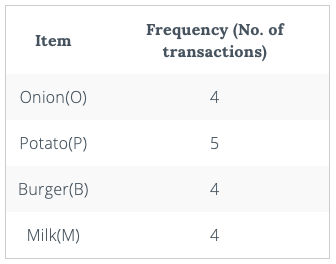

In [10]:
Image(filename='Images/Apriori.v2.png')

3- The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA. To do this, take the first item and pair it with all the others such as OP, OB, OM. Similarly, consider the second item and pair it with preceding items, i.e., PB, PM. We are only considering the preceding items because PO (same as OP) already exists. So, all the pairs in our example are OP, OB, OM, PB, PM, BM.

4- We will now count the occurrences of each pair in all the transactions.

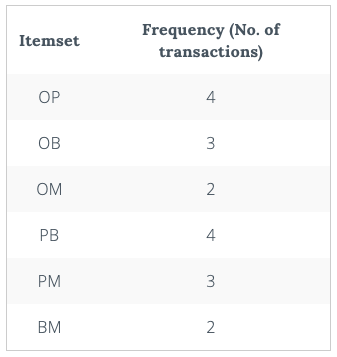

In [11]:
Image(filename='Images/Apriori.v4.png')

5- Again only those itemsets are significant which cross the support threshold, and those are OP, OB, PB, and PM.

6- Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

To create a set of 3 items another rule, called self-join is required. It says that from the item pairs OP, OB, PB and PM we look for two pairs with the identical first letter and so we get

OP and OB, this gives OPB, 
PB and PM, this gives PBM
Next, we find the frequency for these two itemsets.

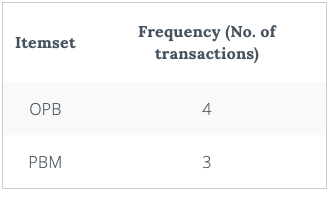

In [12]:
Image(filename='Images/Apriori.v6.png')

## Python apriori library 

In [13]:
!pip install efficient_apriori 

In [14]:
from efficient_apriori import apriori

In [25]:
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [26]:
data_itemset = data.groupby('Transaction')['Item'].apply(pd.Series.tolist).tolist()


In [27]:
for i in range(len(data_itemset)):
    data_itemset[i] = tuple(data_itemset[i])


In [28]:
itemsets, rules = apriori(data_itemset[0:], min_support=.01,  min_confidence=.1)

The apriori() function, returns both the itemsets and the association rules for the specified support and confidence levels.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

- Run apriori algorithm for different min_support and a fixed min_confidence and plot a graph with x axis min_support and y-axis to be the number of rules generated.


- Run apriori algorithm for different min_confidence and a fixed min_support and plot a graph with x axis min_support and y-axis to be the number of rules generated.

</div>

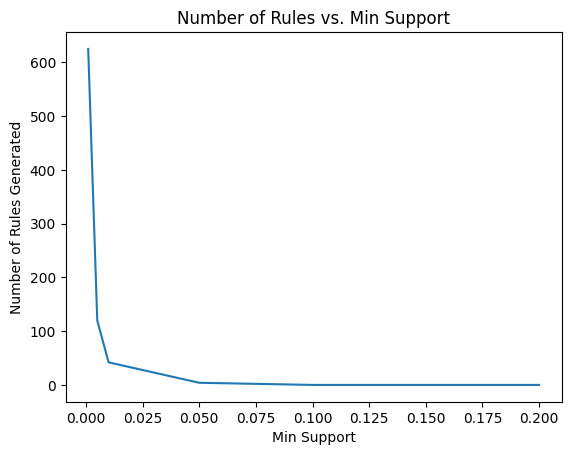

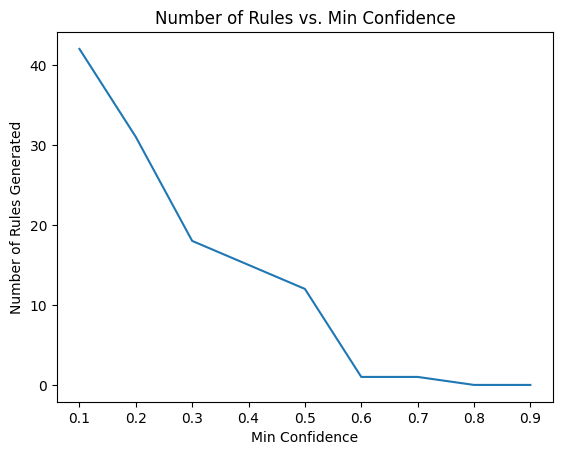

In [19]:
#please implement Task 6 here

import pandas as pd
import matplotlib.pyplot as plt


# Task 6.1:
support_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2]
num_rules_support = []

for support in support_values:
    _, rules = apriori(data_itemset, min_support=support,  min_confidence=0.1)
    num_rules_support.append(len(rules))

plt.plot(support_values, num_rules_support)
plt.xlabel('Min Support')
plt.ylabel('Number of Rules Generated')
plt.title('Number of Rules vs. Min Support')
plt.show()

# Task 6.2:
confidence_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_rules_confidence = []

for confidence in confidence_values:
    _, rules = apriori(data_itemset, min_support=0.01,  min_confidence=confidence)
    num_rules_confidence.append(len(rules))

plt.plot(confidence_values, num_rules_confidence)
plt.xlabel('Min Confidence')
plt.ylabel('Number of Rules Generated')
plt.title('Number of Rules vs. Min Confidence')
plt.show()


## Visualization Association Rules

In [20]:
!pip install networkx

Below we define a method using the networkx library to visualize our association rules through a graph structure

In [29]:
import networkx as nx

def draw_graph(rules, rules_to_show):
    
    # Creating a directed graph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R" + str(i)])

        for a in rules[i].lhs:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)

        for c in rules[i].rhs:
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G1.nodes():
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    print(edges)
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    
    # Draw the graph with labels
    nx.draw(G1, pos, edgelist=edges, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)
    
    for p in pos:  
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    
    plt.show()


[('R0', 'Coffee'), ('Spanish Brunch', 'R0'), ('Coffee', 'R2'), ('Coffee', 'R8'), ('R1', 'Coffee'), ('Tea', 'R1'), ('Tea', 'R4'), ('Tea', 'R6'), ('R2', 'Tea'), ('R3', 'Coffee'), ('Toast', 'R3'), ('R4', 'NONE'), ('NONE', 'R5'), ('R5', 'Tea'), ('R6', 'Sandwich'), ('Sandwich', 'R7'), ('R7', 'Tea'), ('R8', 'Bread'), ('Pastry', 'R8'), ('Pastry', 'R9'), ('Bread', 'R9'), ('R9', 'Coffee')]


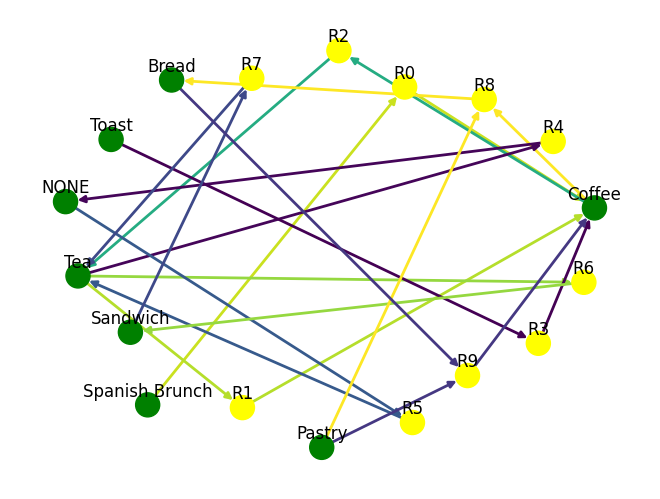

In [30]:
# We visualize a structure here

# Check if the slice contains data
if rules[30:40]:
    draw_graph(rules[30:40], 10)
else:
    print("The specified rule slice is empty.")



<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task7

Draw a graph that shows a consequence and precedence for each rule around it.

More concretely consider consequence to be "Bread" and choose at most 12 rules.

</div>

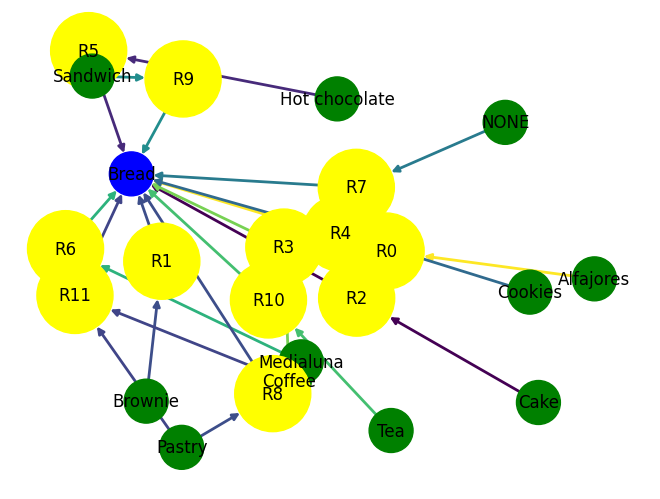

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Function to filter rules by consequence
def filter_rules_by_consequence(rules, consequence):
    return [rule for rule in rules if consequence in rule.rhs]

# Function to visualize rules
def visualize_rules(rules, rules_to_show):
    G = nx.DiGraph()
    color_map = []
    colors = np.random.rand(50)
    
    # Add nodes and edges to the graph
    for i in range(min(rules_to_show, len(rules))):
        rule = rules[i]
        G.add_node("R" + str(i), color='yellow', size=3000)
        for item in rule.lhs:
            G.add_node(item, color='green', size=1000)
            G.add_edge(item, "R" + str(i), color=colors[i], weight=2)
        for item in rule.rhs:
            G.add_node(item, color='blue', size=1000)
            G.add_edge("R" + str(i), item, color=colors[i], weight=2)
    
    # Define color map for the nodes
    color_map = [data['color'] for node, data in G.nodes(data=True)]
    sizes = [data['size'] for node, data in G.nodes(data=True)]
    
    # Extract edges for visualization
    edges = G.edges()
    colors = [G[u][v]['color'] for u, v in edges]
    weights = [G[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=color_map, edge_color=colors, width=weights, with_labels=True, node_size=sizes)
    plt.show()

# Filter rules and visualize
bread_rules = filter_rules_by_consequence(rules, "Bread")
visualize_rules(bread_rules, 12)


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task8

In the default credit dataset try to find the followings.

- Find a concise pattern.
- Find a general pattern.
- Find a peculiar pattern.

Use the definition of conciseness, generality and peculiarity from the following paper.

https://www.researchgate.net/publication/220566216_Interestingness_Measures_for_Data_Mining_A_Survey

</div>

In [48]:
!pip install xlrd
!pip install mlxtend

In [34]:
credit_dataset = pd.read_excel('default_of_credit_card_clients.xls')
credit_dataset

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Concise pattern: These are patterns that convey the most information with the least amount of items. They are short but informative. For instance, a rule with fewer items (attributes) that has a very high confidence might be considered concise.

General pattern: These are patterns that apply to a large portion of the dataset. They capture broad tendencies in the data. For instance, a rule that has a very high support (applies to a large number of instances) might be considered general.

Peculiar pattern: These are unusual or unexpected patterns. They might not apply to a large portion of the dataset, but they are interesting because they defy our expectations. A rule with low support but very high confidence or lift might be considered peculiar.

In [50]:
# Calculate the correlation of each feature with 'default payment next month'
correlations = credit_dataset.corr()['default payment next month'].sort_values()

# Display the correlations
correlations


LIMIT_BAL                    -0.153461
LIMIT_HIGH                   -0.150938
PAY_AMT1                     -0.072913
PAY_AMT2                     -0.058568
PAY_AMT4                     -0.056812
PAY_AMT3                     -0.056235
PAY_AMT5                     -0.055107
PAY_AMT6                     -0.053168
SEX                          -0.040014
MARRIAGE                     -0.024275
BILL_AMT1                    -0.019605
BILL_AMT2                    -0.014154
BILL_AMT3                    -0.014035
ID                           -0.013845
BILL_AMT4                    -0.010115
BILL_AMT5                    -0.006719
BILL_AMT6                    -0.005332
AGE                           0.013969
EDUCATION                     0.027996
LIMIT_MED                     0.056478
LIMIT_LOW                     0.137558
PAY_6                         0.186977
PAY_5                         0.204265
PAY_4                         0.216670
PAY_3                         0.235312
PAY_2                    

The attribute \text{PAY_0} (which represents the repayment status in the most recent month) has the strongest positive correlation with defaulting the next month. This suggests that clients who have had payment difficulties in the most recent month are more likely to default in the following month.

In [51]:
# Group by 'default payment next month' and then get the value counts of 'EDUCATION'
education_default = credit_dataset.groupby('default payment next month')['EDUCATION'].value_counts(normalize=True).unstack()

# Display the distribution of education levels among defaulters and non-defaulters
education_default


EDUCATION,0,1,2,3,4,5,6
default payment next month,,,,,,,
0,0.000599,0.365905,0.457970,0.157507,0.004965,0.011214,0.001840
1,NaN,0.306858,0.501733,0.186436,0.001055,0.002713,0.001206


Education Level 1 (Graduate School):
Non-defaulters: 36.59%
Defaulters: 30.68%
Education Level 2 (University):
Non-defaulters: 45.80%
Defaulters: 50.18%
Education Level 3 (High School):
Non-defaulters: 15.75%
Defaulters: 18.64%
From this, we can observe a general pattern: Clients with an education level of 'University' (Level 2) are the most common among both defaulters and non-defaulters, but they make up a slightly larger proportion of the defaulters.

In [52]:
# Group the credit limits into bins for easier visualization
credit_dataset['LIMIT_BAL_BIN'] = pd.cut(credit_dataset['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 300000, 400000, 500000, credit_dataset['LIMIT_BAL'].max()+1])

# Group by 'default payment next month' and then get the value counts of 'LIMIT_BAL_BIN'
credit_limit_default = credit_dataset.groupby('default payment next month')['LIMIT_BAL_BIN'].value_counts(normalize=True).unstack()

# Display the distribution of credit limits among defaulters and non-defaulters
credit_limit_default


LIMIT_BAL_BIN,"(0, 50000]","(50000, 100000]","(100000, 200000]","(200000, 300000]","(300000, 400000]","(400000, 500000]","(500000, 1000001]"
default payment next month,,,,,,,
0,0.224105,0.153142,0.271572,0.181775,0.101481,0.060092,0.007833
1,0.367596,0.187491,0.231349,0.122381,0.058478,0.029239,0.003466


Credit Limit (0 - 50,000):
Non-defaulters: 22.41%
Defaulters: 36.77%
Credit Limit (50,000 - 100,000):
Non-defaulters: 15.31%
Defaulters: 18.75%
Credit Limit (100,000 - 200,000):
Non-defaulters: 27.16%
Defaulters: 23.13%
Credit Limit (200,000 - 300,000):
Non-defaulters: 18.18%
Defaulters: 12.24%
Interestingly, a significant portion (36.77%) of defaulters falls within the lowest credit limit bin (0 - 50,000). While it might be expected that clients with lower credit limits could be more likely to default, the disparity between the defaulters and non-defaulters in this category is quite notable.


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task9

How is entropy related to frequncy of itermsets? explain.

To get help, refer to the following paper.

https://www.researchgate.net/publication/221653139_Finding_low-entropy_sets_and_trees_from_binary_data/link/5414967d0cf2bb7347db32fa/download

</div>

High Frequency, Low Entropy: An itemset that frequently appears in most transactions will have a high frequency. If this itemset predominantly appears in one specific type of transaction and rarely in others, its entropy will be low. This means the itemset is not evenly distributed among all transaction types, making its appearance more predictable.

Low Frequency, High Entropy: An itemset with a low frequency of appearance might still have high entropy if it appears sporadically and unpredictably among various transaction types.

Low Frequency, Low Entropy: An itemset that rarely appears and, when it does, appears predominantly in a specific type of transaction will have both low frequency and low entropy.

High Frequency, High Entropy: This would indicate an itemset that appears frequently and is evenly distributed across various transaction types, making its appearance less predictable.